In [1]:
import sys
sys.path.insert(0, "../../python")
import time

In [2]:
from deepview.nn.datasets.iterators import ObjectDetectionIterator, TFObjectDetectionIterator
from deepview.nn.datasets.readers import TFPolarsDetectionReader

2024-01-30 16:03:35.195355: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-30 16:03:35.220449: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-30 16:03:35.596336: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
reader = TFPolarsDetectionReader(
    inputs = "playingcards-polars/train/images_*.arrow",
    annotations = "playingcards-polars/train/boxes_*.arrow"
)

In [5]:
# Loading dataset cache into memory
iterator = TFObjectDetectionIterator(
    reader=reader,
    shape=(320, 320, 3)
)

In [7]:
# Loading dataset cache into a file
iterator = TFObjectDetectionIterator(
    reader=reader,
    shape=(320, 320, 3),
    cache="playingcards-polars/tf-cache"
)

In [8]:
# Shuffle dataset
iterator = TFObjectDetectionIterator(
    reader=reader,
    shape=(320, 320, 3),
    shuffle=True,
    cache="playingcards-polars/tf-cache"
)

In [10]:
print("measuring augmentation speed...")
num_iters = len(iterator)

st = time.time()
for i, instance in enumerate(iterator.iterator()):
    images = instance[0]
    boxes = instance[1]
    # print(images.shape, boxes.shape)
ed = time.time()
print(f"{1 / ((ed - st) / num_iters) * 9:.3f} FPS")   

measuring augmentation speed...


/home/reinier/development/deepview-datasets/.venv/lib/python3.8/site-packages/numpy/ctypeslib.py:526: RuntimeWarning: A builtin ctypes object gave a PEP3118 format string that does not match its itemsize, so a best-guess will be made of the data type. Newer versions of python may behave correctly.
  return asarray(obj)


1528.505 FPS


In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

['seven', 'ten', 'jack', 'ace', 'five', 'four', 'nine', 'queen', 'king', 'six', 'three', 'eight', 'two']
tf.Tensor([0.6109375  0.525      0.284375   0.34583336 8.        ], shape=(5,), dtype=float32) king
tf.Tensor([0.5570313  0.24895833 0.2046875  0.18541667 8.        ], shape=(5,), dtype=float32) king
tf.Tensor([0.3015625  0.52708334 0.221875   0.3375     8.        ], shape=(5,), dtype=float32) king
tf.Tensor([0.33984375 0.25104168 0.16718751 0.16875    8.        ], shape=(5,), dtype=float32) king


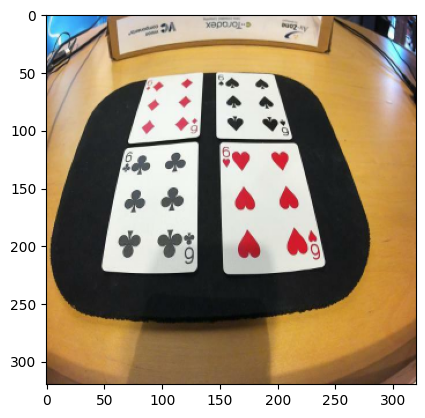

In [21]:
classes = reader.classes
print(classes)
for i, instance in enumerate(iterator.iterator()):
    images = instance[0].numpy().astype(np.uint8)
    boxes = instance[1]
    
    for b in boxes:
        print(b, classes[int(b[-1])])
    plt.imshow(images)
    break